# Домашнее задание № 8 "Визуализация данных в Python"

<pre>
ФИО: Никифоров Владимир
</pre>

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import numpy as np
from datetime import datetime
import yaml

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw = pd.read_csv('../data/tmdb_5000_movies.csv').dropna()
raw.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 0 to 4801
Data columns (total 20 columns):
budget                  1493 non-null int64
genres                  1493 non-null object
homepage                1493 non-null object
id                      1493 non-null int64
keywords                1493 non-null object
original_language       1493 non-null object
original_title          1493 non-null object
overview                1493 non-null object
popularity              1493 non-null float64
production_companies    1493 non-null object
production_countries    1493 non-null object
release_date            1493 non-null object
revenue                 1493 non-null int64
runtime                 1493 non-null float64
spoken_languages        1493 non-null object
status                  1493 non-null object
tagline                 1493 non-null object
title                   1493 non-null object
vote_average            1493 non-null float64
vote_count              1493 non-null 

In [4]:
# Filter columns
df = raw[['runtime','release_date','budget','vote_average','genres']]
# Leave Year only from 'release_date'
df['release_date'] = df.apply(lambda x: datetime.strptime(x['release_date'], '%Y-%m-%d').year if type(x['release_date']) == str else 1900, axis=1).astype('int64')
# Drop unusefull rows as outliers
df = df[(df['release_date']>1900) & (df['genres'] != '[]') & (df['runtime']>0) & (df['budget']>0) & (df['vote_average']>0) & (df['budget']<3e8)]
# Get First Genre from genres as TOP1 for each film
df['top_genre'] = df.apply(lambda x: [g['name'] for g in yaml.load(x['genres'])][0], axis=1)
df = df[['runtime','release_date','budget','vote_average','top_genre']]
df.head()

/home/truename/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,runtime,release_date,budget,vote_average,top_genre
0,162.0,2009,237000000,7.2,Action
2,148.0,2015,245000000,6.3,Action
3,165.0,2012,250000000,7.6,Action
4,132.0,2012,260000000,6.1,Action
5,139.0,2007,258000000,5.9,Fantasy


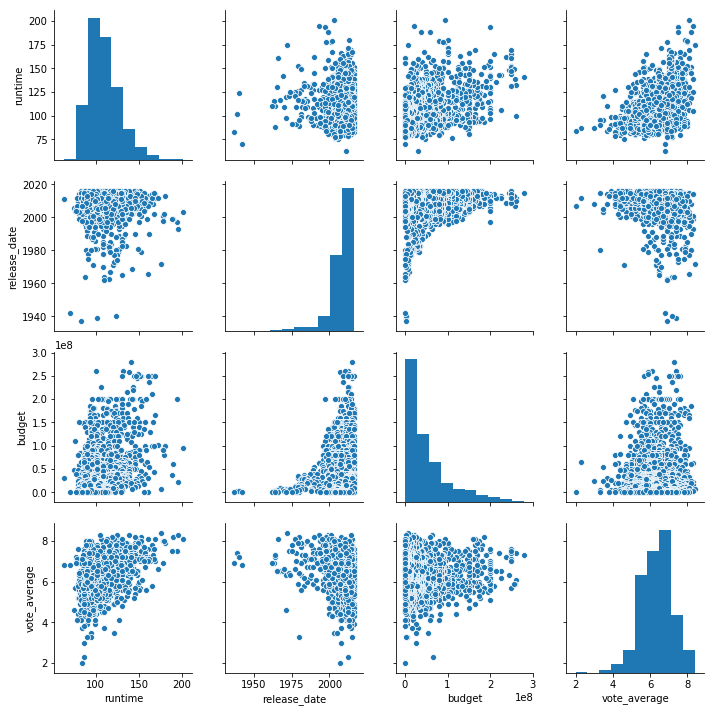

In [5]:
# Рассмотрим гистограммы распределения и корреляции выбранных численных показателей runtime, release_date, budget и vote_average.
# Pairplot удобен тем, что такую информацию можно получить сразу одной командой
sns.pairplot(df[['runtime','release_date','budget','vote_average']]);

In [6]:
# Для каждого основного жанра посчитаем медианное значение среднего рейтинга (vote_average) и выведем в виде горизонтальной столбчатой диаграммы сразу в столбце таблицы
df.groupby('top_genre')[['vote_average']].median().style.bar()

,vote_average
top_genre,
Action,6.2
Adventure,6.5
Animation,6.5
Comedy,6
Crime,6.5
Documentary,6.95
Drama,6.8
Family,6.3
Fantasy,6.2


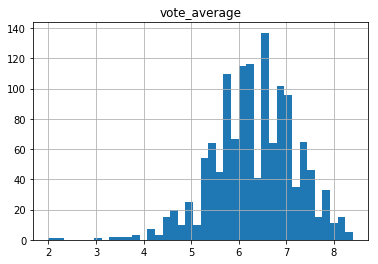

In [7]:
# Рассмотрим заодно частоту каждого из рейтингов (vote_average) в датасете и увидим, что наибольшее количество оценок 6.5
df[['vote_average']].hist(bins=40);

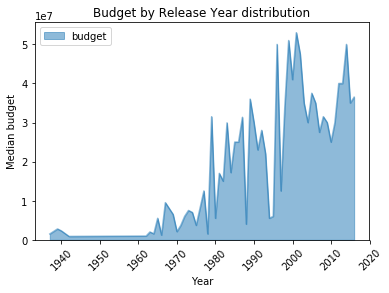

In [8]:
# Из наших данных можно также увидеть с помощью area-визуализации распределение медианы бюджетов фильмов по годам
ax = df.groupby('release_date')[['budget']].median().plot(kind='area', rot=45, stacked=False);
ax.set_title('Budget by Release Year distribution');
ax.set_xlabel('Year');
ax.set_ylabel('Median budget');

/home/truename/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


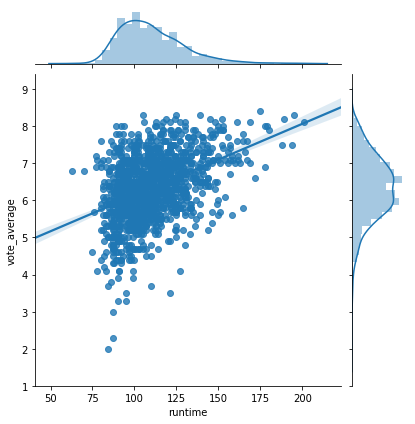

In [9]:
# Интересно, можно ли сделать какие-либо выводы по совместному графику jointplot длительности фильмы с его рейтингом, и также посмотреть на гистограммы двух величин в отдельности
sns.jointplot(x='runtime', y='vote_average', data=df, kind='reg');

In [10]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [11]:
trace0 = go.Box(
    x=df.release_date,
    y=df.vote_average,
    name='Vote average per Release_Date'
)
  
data = [trace0]
layout = {'title': 'Statistics of movie quality per years'}

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
plot(data,layout,filename='../img/plotly.html');

In [12]:
# С помощью plotly можно строить интерактивные графики, как в данном случае boxplot-ы с рейтингом по годам - видно, что раньше фильмы оценивались лучшими оценками (медианные значения)
import IPython
iframe = '<iframe width="1400" height="600" frameborder="0" scrolling="no" src="../img/plotly.html"></iframe>'
IPython.display.HTML(iframe)

In [15]:
# результат - график Plotly
from IPython.display import Image

![FIO](../img/plotly.png)

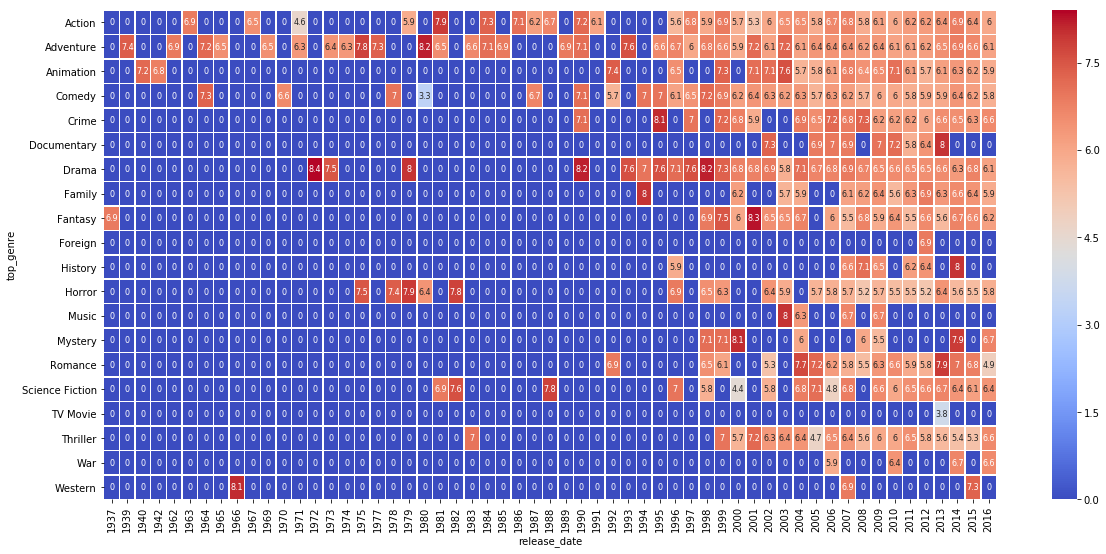

In [13]:
# Очень интересный график - heatmap - позволяет быстро выделить минимум/максимум значений - в данном случае мы видим, какие жанры когда снимаются и какие средние оценки по ним выставлены.
df_pivot = df.pivot_table(
                        index='top_genre', 
                        columns='release_date', 
                        values='vote_average', 
                        aggfunc=np.mean).fillna(0).applymap(float)

rcParams['figure.figsize'] = 20,9
sns.heatmap(df_pivot,
            cmap='coolwarm',
            annot=True,
            annot_kws={'size':8},
            linewidths=0.5
           );

Также было бы классно, если бы вы кратко писали выводы, которые можно сделать из ваших графиков, ведь именно для этого визуализация и нужна :) Вряд ли осмысленно построение графика с огромным количеством боксплотов, особенно без цветовой индикации.